<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import datetime

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Load dataset

sf_fire = '/Users/Divya/desktop/DSI-SF-2/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv'
sf_fire = pd.read_csv(sf_fire)

//anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11,12,19,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Take a look at dataset

sf_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406736 entries, 0 to 406735
Data columns (total 63 columns):
Incident Number                                 406736 non-null int64
Exposure Number                                 406736 non-null int64
Address                                         406633 non-null object
Incident Date                                   406736 non-null object
Call Number                                     406736 non-null int64
Alarm DtTm                                      406736 non-null object
Arrival DtTm                                    406718 non-null object
Close DtTm                                      406736 non-null object
City                                            405509 non-null object
Zipcode                                         334349 non-null float64
Battalion                                       406736 non-null object
Station Area                                    406207 non-null object
Box                                    

In [4]:
# Since there are many columns that are objects and I need continuous data, I am going to subset my data.
# I am choosing my columns that are mostly int or float and I am not going to include columns that are missing alot of data

sf_fire_sub = sf_fire[['Incident Number', 
                       'Exposure Number',
                       'Call Number',
                       'Alarm DtTm',
                       'Arrival DtTm',
                       'Suppression Units',
                       'Suppression Personnel',
                       'EMS Units',
                       'EMS Personnel',
                       'Other Units',
                       'Other Personnel',
                       'Fire Fatalities',
                       'Fire Injuries',
                       'Civilian Fatalities',
                       'Civilian Injuries']]
sf_fire_sub.head()

,Incident Number,Exposure Number,Call Number,Alarm DtTm,Arrival DtTm,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries
0,9030109,0,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,1,5,0,0,0,0,0,0,0,0
1,13067402,0,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,3,11,0,0,0,0,0,0,0,0
2,12044490,0,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,3,10,0,0,0,0,0,0,0,0
3,13033326,0,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,3,10,0,0,0,0,0,0,0,0
4,11101416,0,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,2,9,0,0,0,0,0,0,0,0


In [5]:
sf_fire_sub.isnull().sum()

Incident Number           0
Exposure Number           0
Call Number               0
Alarm DtTm                0
Arrival DtTm             18
Suppression Units         0
Suppression Personnel     0
EMS Units                 0
EMS Personnel             0
Other Units               0
Other Personnel           0
Fire Fatalities           0
Fire Injuries             0
Civilian Fatalities       0
Civilian Injuries         0
dtype: int64

In [6]:
sf_fire_sub.dropna(inplace = True)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
# I would like to convert the DtTm columns and subtract the Arrival column and the Alarm column
# This would give me the response time and I would like to use this as my target. 

sf_fire_sub['Alarm DtTm'] = pd.to_datetime(sf_fire_sub['Alarm DtTm'])
sf_fire_sub['Arrival DtTm'] = pd.to_datetime(sf_fire_sub['Arrival DtTm'])

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
sf_fire_sub['Response_Time'] = sf_fire_sub['Arrival DtTm'] - sf_fire_sub['Alarm DtTm']

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
sf_fire_sub.head()

,Incident Number,Exposure Number,Call Number,Alarm DtTm,Arrival DtTm,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Response_Time
0,9030109,0,91020273,2009-04-12 18:09:13,2009-04-12 18:13:45,1,5,0,0,0,0,0,0,0,0,00:04:32
1,13067402,0,131990117,2013-07-18 10:32:03,2013-07-18 10:37:15,3,11,0,0,0,0,0,0,0,0,00:05:12
2,12044490,0,121340051,2012-05-13 03:55:37,2012-05-13 04:01:57,3,10,0,0,0,0,0,0,0,0,00:06:20
3,13033326,0,130990286,2013-04-09 16:34:07,2013-04-09 16:39:31,3,10,0,0,0,0,0,0,0,0,00:05:24
4,11101416,0,113050357,2011-11-01 18:07:45,2011-11-01 18:10:17,2,9,0,0,0,0,0,0,0,0,00:02:32


In [11]:
sf_fire_sub.isnull().sum()

Incident Number          0
Exposure Number          0
Call Number              0
Alarm DtTm               0
Arrival DtTm             0
Suppression Units        0
Suppression Personnel    0
EMS Units                0
EMS Personnel            0
Other Units              0
Other Personnel          0
Fire Fatalities          0
Fire Injuries            0
Civilian Fatalities      0
Civilian Injuries        0
Response_Time            0
dtype: int64

In [12]:
sf_fire_sub = sf_fire_sub.rename(columns = {'Incident Number': 'Incident_Number',
                   'Exposure Number': 'Exposure_Number',
                   'Call Number': 'Call_Number',
                   'Alarm DtTm': 'Alarm_DtTm',
                   'Arrival DtTm': 'Arrival_DtTm',
                   'Suppression Units': 'Suppression_Units',
                   'Suppression Personnel': 'Suppression_Personnel',
                   'EMS Units': 'EMS_Units',
                   'EMS Personnel': 'EMS_Personnel',
                   'Other Units': 'Other_Units',
                   'Other Personnel': 'Other_Personnel',
                   'Fire Fatalities': 'Fire_Fatalities',
                   'Fire Injuries': 'Fire_Injuries',
                   'Civilian Fatalities': 'Civilian_Fatalities',
                   'Civilian Injuries': 'Civilian_Injuries',
                   'Response_Time': 'Response_Time'})

sf_fire_sub.head()

,Incident_Number,Exposure_Number,Call_Number,Alarm_DtTm,Arrival_DtTm,Suppression_Units,Suppression_Personnel,EMS_Units,EMS_Personnel,Other_Units,Other_Personnel,Fire_Fatalities,Fire_Injuries,Civilian_Fatalities,Civilian_Injuries,Response_Time
0,9030109,0,91020273,2009-04-12 18:09:13,2009-04-12 18:13:45,1,5,0,0,0,0,0,0,0,0,00:04:32
1,13067402,0,131990117,2013-07-18 10:32:03,2013-07-18 10:37:15,3,11,0,0,0,0,0,0,0,0,00:05:12
2,12044490,0,121340051,2012-05-13 03:55:37,2012-05-13 04:01:57,3,10,0,0,0,0,0,0,0,0,00:06:20
3,13033326,0,130990286,2013-04-09 16:34:07,2013-04-09 16:39:31,3,10,0,0,0,0,0,0,0,0,00:05:24
4,11101416,0,113050357,2011-11-01 18:07:45,2011-11-01 18:10:17,2,9,0,0,0,0,0,0,0,0,00:02:32


In [13]:
# need to convert my response times to seconds and then integers

def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

sf_fire_sub['total_sec'] = sf_fire_sub['Response_Time'].apply(str).apply(lambda x: x[7:]).apply(get_sec)

In [14]:
# Hypothesis: Response time (in total seconds) impacts civilian and fire fatalities. 

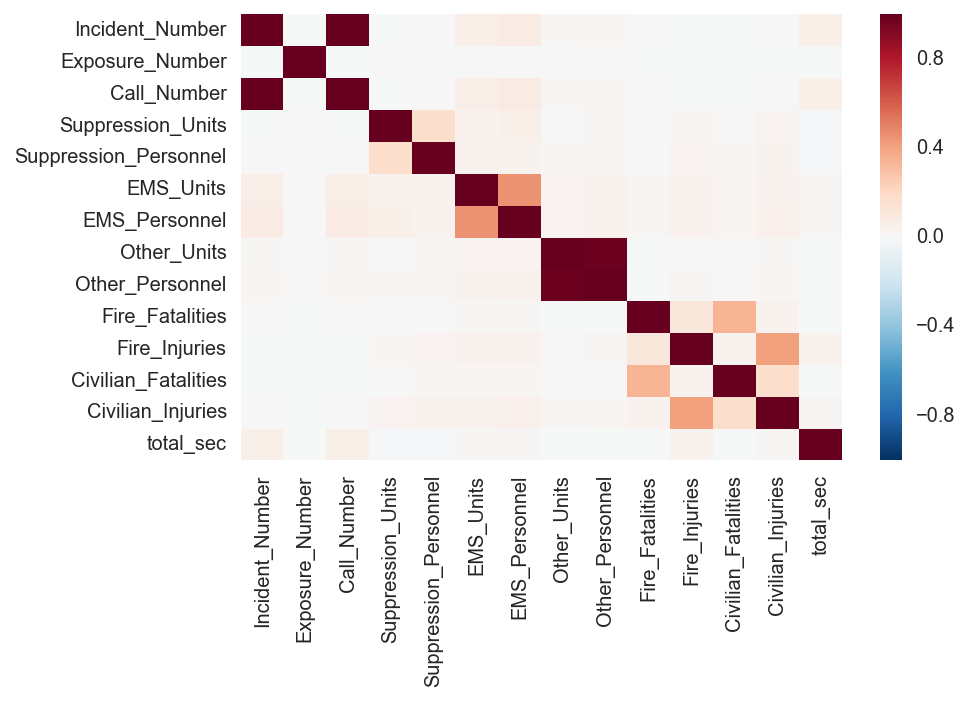

In [15]:
sf_fire_corr = sf_fire_sub.corr()
sns.heatmap(sf_fire_corr)

In [16]:
sf_fire_sub.to_csv(path_or_buf='~/sf_fire_sub.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [17]:
formula = 'total_sec ~ Fire_Fatalities + Civilian_Fatalities'
y, X = patsy.dmatrices(formula, data=sf_fire_sub, return_type='dataframe')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33)

In [19]:
lr = LinearRegression()

In [20]:
model= lr.fit(X_train,y_train)

In [21]:
predictions = model.predict(X_test)
predictions

array([[ 316.48476554],
       [ 316.48476554],
       [ 316.48476554],
       ..., 
       [ 316.48476554],
       [ 316.48476554],
       [ 316.48476554]])

In [22]:
mean_squared_error(y_test, predictions)

407013.0720822484

In [25]:
score = model.score(X_test,y_test)
score

# This means that there is no correlation among our target and variables

-1.2537831870496063e-05

In [24]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lr, X, y, cv = 5)
scores

# The cross val r2 are also showing us that there is no correlation among our target and variables
# Both results show us the same information

array([ -2.67847540e-04,  -4.35058568e-04,  -2.67846932e-04,
        -5.99942212e-05,  -8.56877363e-03])

In [ ]:
# Civilian and Fire Fatalities do not have an impact on Response Times.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ be negative when the model is tested on new data?

In [26]:
# 1. If you have negative R2 values, it means that your model performed worse than the mean
# 2. R2 can be negative on new data because it is scoring on data the model has not seen before. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [2]:
sf_assessor = pd.read_csv('/Users/Divya/Desktop/DSI-SF-2/datasets/san_francisco/san_francisco/assessor_office/assessor_data_2007_2008.csv')
sf_assessor.head(3)

//anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PROPLOC,RP1NBRCDE,RP1PRCLID,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,ROOMS,STOREYNO,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
0,0000 0000 0000,08H,0001 001,1,G,1900,0,0,0,0,...,NaN,N,0,0,7,0,0,0,0,0
1,0000 0000 0000,08H,0002 001,1,G,1900,0,0,0,0,...,NaN,N,0,0,7,0,0,0,0,0
2,0000 0000 0000,08H,0004 002,1,V,0,0,0,0,0,...,NaN,N,0,0,7,0,0,0,0,0


In [3]:
sf_assessor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197778 entries, 0 to 197777
Data columns (total 36 columns):
PROPLOC       197778 non-null object
RP1NBRCDE     197667 non-null object
RP1PRCLID     197778 non-null object
RP1VOLUME     197778 non-null int64
RP1CLACDE     197702 non-null object
YRBLT         197778 non-null int64
BATHS         197778 non-null int64
BEDS          197778 non-null int64
ROOMS         197778 non-null int64
STOREYNO      197778 non-null int64
UNITS         197778 non-null int64
CHGDATE       197778 non-null int64
ZONE          175850 non-null object
CONSTTYPE     171526 non-null object
DEPTH         197778 non-null float64
FRONT         197778 non-null float64
SQFT          197778 non-null int64
FBA           197778 non-null int64
LAREA         197778 non-null float64
LOTCODE       71546 non-null object
REPRISDATE    0 non-null float64
RP1RECDAT1    197778 non-null int64
RP1DOCNO1     65912 non-null object
RP1DOCNO2     197778 non-null int64
RP1TRACDE     19

In [4]:
# Creating a new dataset of a subgroup of variables

sf_assessor_1 = sf_assessor[['YRBLT','BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH', 'FRONT',
                             'SQFT', 'FBA', 'LAREA','OWNRPRCNT', 'RP1FXTVAL', 'RP1IMPVAL','RP1LNDVAL', 'RP1PPTVAL']]

In [5]:
sf_assessor_1.columns = ['yr_blt','baths','beds','rooms','storeis','units','depth','front','sqft','sqft_basement',
                         'sqft_lot','owner_prec','fixt_val','improv_val','land_val', 'personal_val']

In [6]:
sf_assessor_1.head()

,yr_blt,baths,beds,rooms,storeis,units,depth,front,sqft,sqft_basement,sqft_lot,owner_prec,fixt_val,improv_val,land_val,personal_val
0,1900,0,0,0,0,0,0.0,0.0,0,0,27965.0,1.0,0,0,0,0
1,1900,0,0,0,0,0,0.0,0.0,0,0,8359.0,1.0,0,0,0,0
2,0,0,0,0,0,0,0.0,0.0,0,0,0.0,1.0,0,0,0,0
3,1900,0,0,0,0,0,0.0,0.0,0,0,68153.0,1.0,0,0,0,0
4,1900,0,0,0,0,0,0.0,0.0,0,0,108015.0,1.0,0,0,0,0


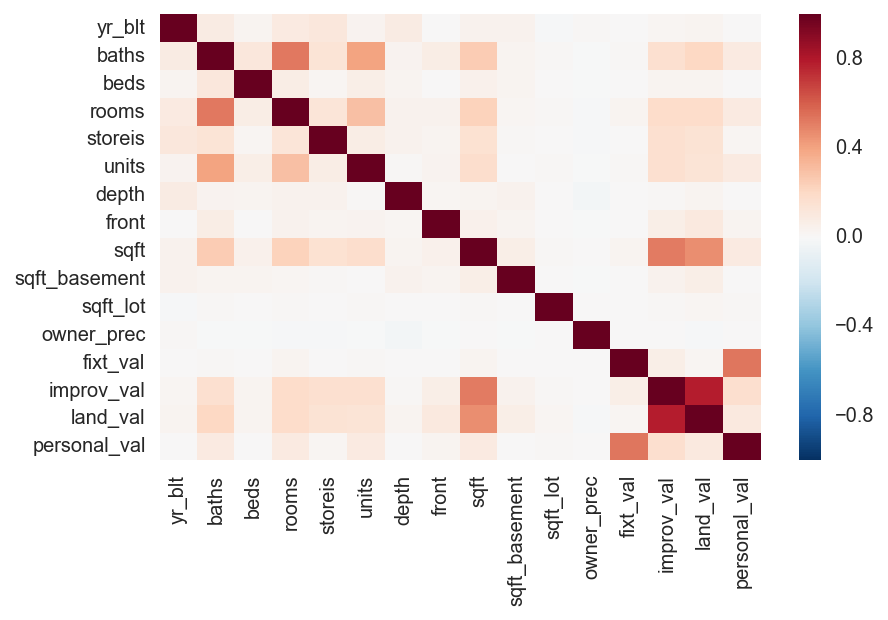

In [7]:
sf_assessor_corr = sf_assessor_1.corr()
sns.heatmap(sf_assessor_corr)

In [8]:
sf_assessor_1['value']=sf_assessor_1.fixt_val + sf_assessor_1.improv_val + sf_assessor_1.land_val

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
sf_assessor_1.head()

,yr_blt,baths,beds,rooms,storeis,units,depth,front,sqft,sqft_basement,sqft_lot,owner_prec,fixt_val,improv_val,land_val,personal_val,value
0,1900,0,0,0,0,0,0.0,0.0,0,0,27965.0,1.0,0,0,0,0,0
1,1900,0,0,0,0,0,0.0,0.0,0,0,8359.0,1.0,0,0,0,0,0
2,0,0,0,0,0,0,0.0,0.0,0,0,0.0,1.0,0,0,0,0,0
3,1900,0,0,0,0,0,0.0,0.0,0,0,68153.0,1.0,0,0,0,0,0
4,1900,0,0,0,0,0,0.0,0.0,0,0,108015.0,1.0,0,0,0,0,0


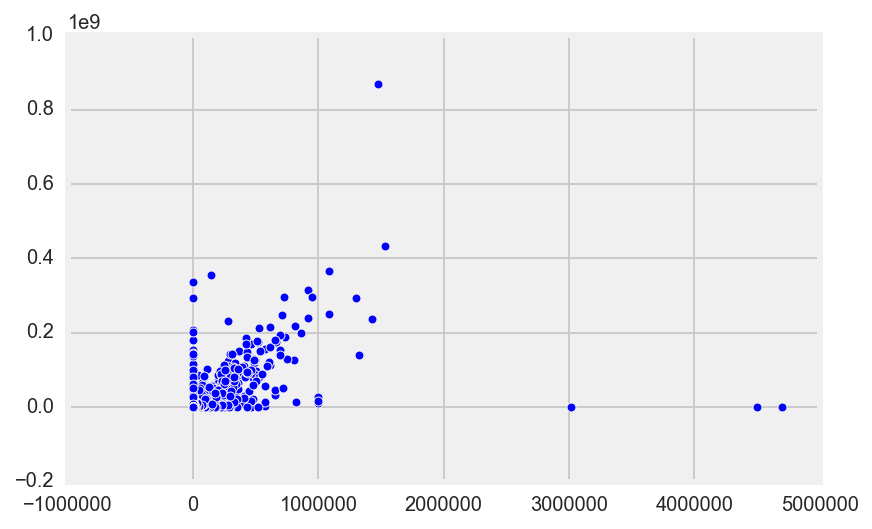

In [10]:
plt.scatter(sf_assessor_1['sqft'].values, sf_assessor_1['value'].values)

In [11]:
# Remove outliers
sf_assessor_1['value'].max()
sf_assessor_2 = sf_assessor_1[sf_assessor_1['value'] < 868020000]

In [12]:
sf_assessor_2 = sf_assessor_2[sf_assessor_2['sqft'] < 3000000]

In [13]:
print sf_assessor_2.value.max()
print sf_assessor_2.value.min()
print sf_assessor_2.value.mean()


print sf_assessor_2.sqft.max()
print sf_assessor_2.sqft.min()
print sf_assessor_2.sqft.mean()

433498561
0
626067.563916
1534312
0
2862.19412056


In [14]:
# Hypothesis: Total Value of a property is impacted by number of baths, bedrooms, rooms and sqft.

In [15]:
from sklearn.cross_validation import cross_val_score

In [16]:
formula = 'value ~ baths + beds + rooms + sqft'
y, X = patsy.dmatrices(formula, data=sf_assessor_2, return_type='dataframe')

lr = LinearRegression()
model= lr.fit(X,y)
predictions = model.predict(X)

scores = cross_val_score(lr, X, y, cv = 6)
print scores
print np.mean(scores)

[ 0.58502063  0.0984489  -0.12020228  0.39482008  0.3805189   0.41102706]
0.291605549404


In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [18]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

ridge_alphas = np.logspace(0, 5, 15)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=6)
optimal_ridge.fit(Xn, y)

print optimal_ridge.alpha_

43939.7056076


In [19]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xn, y, cv=6)

print ridge_scores
print np.mean(ridge_scores)

[ 0.48332826  0.19648422  0.22521849  0.42799292  0.42693498  0.37755129]
0.356251693856


In [20]:
optimal_lasso = LassoCV(n_alphas=15, cv=6, verbose=1)
optimal_lasso.fit(Xn, np.ravel(y))

print optimal_lasso.alpha_

..........................................................................................[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s finished


57895.7892809


In [21]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=6)

print lasso_scores
print np.mean(lasso_scores)

[ 0.57623033  0.12200865  0.25896582  0.40723855  0.39256869  0.41352883]
0.361756812104


In [22]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=15, cv=6,
                            verbose=1)
optimal_enet.fit(Xn, np.ravel(y))

print optimal_enet.alpha_
print optimal_enet.l1_ratio_


...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    7.6s
...........................................................................................................................................................................................................

57895.7892809
1.0


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   38.9s finished


In [23]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xn, y, cv=6)

print enet_scores
print np.mean(enet_scores)

[ 0.57623033  0.12200865  0.25896582  0.40723855  0.39256869  0.41352883]
0.361756812104


In [ ]:
# There is a correlation between my target and variables. Bedrooms, sqft, bathroooms and rooms are good predictors to 
# asses the value of a property. 

In [24]:
# To plot

lr.fit(Xn,y)
ridge.fit(Xn, y)
enet.fit(Xn, y)
lasso.fit(Xn, y)

Lasso(alpha=57895.789280929399, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
y_conv = np.array(y).ravel()
y_conv.shape

(197774,)

In [36]:
lin_pred = model.predict(Xn).ravel()

In [38]:
ridge_pred = ridge.predict(Xn).ravel()

In [40]:
lasso_pred = lasso.predict(Xn).ravel()

In [46]:
enet_pred = enet.predict(Xn).ravel()

In [48]:
linear_resid = y_conv - lin_pred
ridge_resid = y_conv - ridge_pred
lasso_resid = y_conv - lasso_pred
enet_resid = y_conv - enet_pred


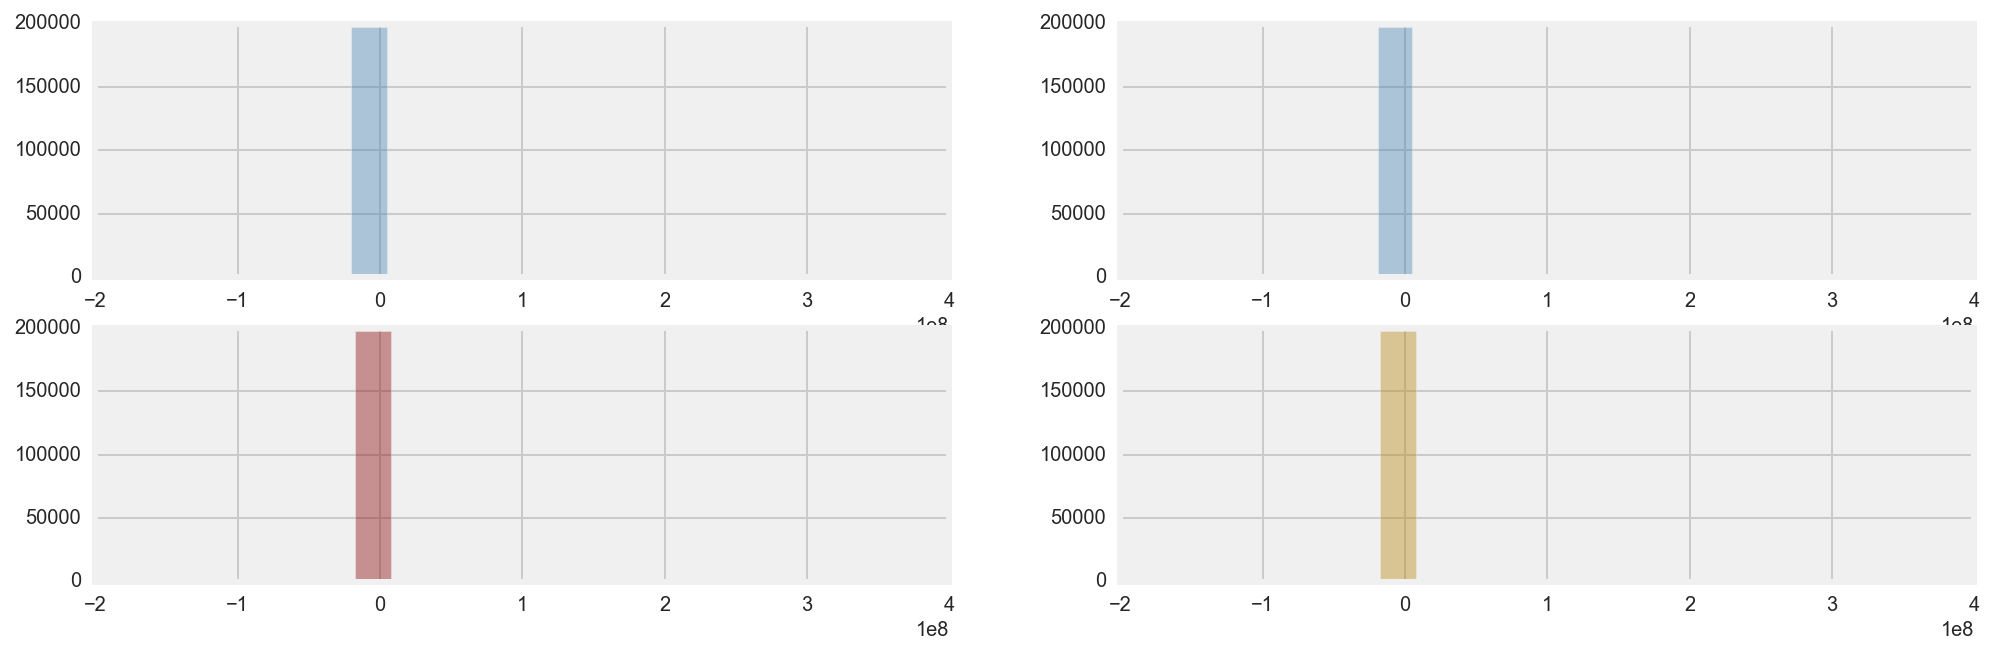

In [82]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 5))

sns.distplot(linear_resid, bins=20, hist=True, kde=False, 
             color='steelblue', ax=axarr[0,0], label='Linear residuals')

sns.distplot(ridge_resid, bins=20, hist=True, kde=False, 
             color='steelblue', ax=axarr[0,1], label='Ridge residuals')

sns.distplot(lasso_resid, bins=20, hist=True, kde=False, 
             color='darkred', ax=axarr[1,0], label='Lasso residuals')

sns.distplot(enet_resid, bins=20, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[1,1], label='ElasticNet residuals')

plt.show()

In [83]:
# Tried to plot my residuals. Graph does not look optimal - need more time to play around with it. 

# Lasso appears to be the best model based on the score results, and the enet also returned the Lasso because it 
# determined it was the best model. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [54]:
park_info = pd.read_csv('/Users/Divya/Desktop/DSI-SF-2/datasets/san_francisco/san_francisco/parks/park_info.csv')
park_scores = pd.read_csv('/Users/Divya/Desktop/DSI-SF-2/datasets/san_francisco/san_francisco/parks/park_scores.csv')

In [81]:
park_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
ParkName           230 non-null object
ParkType           230 non-null object
ParkServiceArea    230 non-null object
PSAManager         230 non-null object
email              230 non-null object
Number             230 non-null object
Zipcode            223 non-null float64
Acreage            229 non-null float64
SupDist            227 non-null float64
ParkID             229 non-null float64
Location 1         202 non-null object
Lat                0 non-null float64
dtypes: float64(5), object(7)
memory usage: 21.6+ KB


In [56]:
park_scores.head(3)

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864


In [57]:
parks = park_info.merge(park_scores, how='left', on='ParkID')

In [58]:
parks.head(3)

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat,PSA,Park,FQ,Score
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY05Q4,0.655
2,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY06Q2,0.854


In [59]:
park_average = parks.groupby('ParkName',as_index=False).mean()
park_av = park_average.drop(['Lat'], axis=1)

In [60]:
park_av.dropna(axis=1)

,ParkName
0,10TH AVE/CLEMENT MINI PARK
1,15TH AVENUE STEPS
2,24TH/YORK MINI PARK
3,29TH/DIAMOND OPEN SPACE
4,ADAM ROGERS PARK
5,ALAMO SQUARE
6,ALICE CHALMERS PLAYGROUND
7,ALICE MARBLE TENNIS COURTS
8,ALIOTO MINI PARK
9,ALLYNE PARK


In [61]:
park_av = park_av.dropna(subset=['Acreage', 'Score'])

In [63]:
print park_av.Acreage.max()
print park_av.Acreage.min()
print park_av.Acreage.mean()
print park_av.Acreage.shape

1031.98
0.0
16.4068852459
(183,)


In [65]:
# Looking at our max, min and mean we can see that we should get rid of some outliers

park_sub = park_av[park_av['Acreage'] < 50]
print park_sub.Acreage.max()
print park_sub.Acreage.min()
print park_sub.Acreage.mean()
print park_sub.Acreage.shape

36.08
0.0
3.64125
(176,)


In [ ]:
# Hypothesis: Acerage impacts the park Score. 

In [71]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

Cross-validated scores: [-0.0029249   0.00022769 -0.05986724 -0.02356209 -0.16646877 -0.03013974]
Cross-Predicted Accuracy: -0.0128429436511


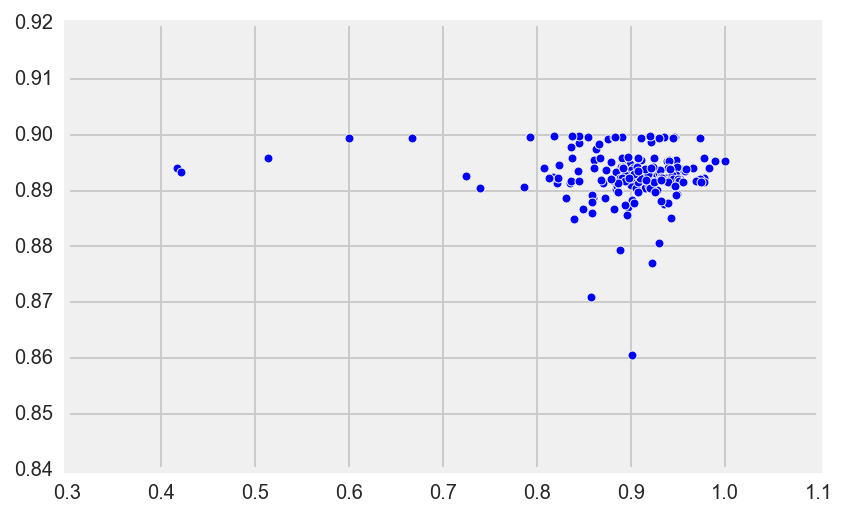

In [72]:
formula = "Score ~ Acreage"
y, X = patsy.dmatrices(formula, data=park_sub, return_type="dataframe")

lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=6)
predictions = cross_val_predict(lm, X, y, cv=6)

print "Cross-validated scores:", scores
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

plt.scatter(y, predictions)

In [76]:
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [77]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=15, cv=6,
                            verbose=1)
optimal_enet.fit(Xn, np.ravel(y))

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
...........................................................................................................................................................................................................

0.0504983320103
0.01


.......................................................................................................................................[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished


In [78]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xn, y, cv=6)

print enet_scores
print np.mean(enet_scores)

[ -2.42652680e-03  -9.76965731e-06  -5.99588363e-02  -2.89555394e-02
  -1.67761279e-01  -2.76941728e-02]
-0.0478010207277


In [ ]:
# There is no correlation between Acerage and Score. Based on our negative r2, the mean is a better predictor than 
# our model. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?